<a href="https://colab.research.google.com/github/gitswathig/assignment3/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 1**

In [ ]:
# Install
!pip install seaborn

# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from google.colab import files


In [ ]:
# Upload the data file
uploaded = files.upload()

# Read the dataset
df = pd.read_csv(next(iter(uploaded.keys())))
df.head()


Saving Dataset .csv to Dataset .csv


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


DATA CLEANING AND HANDLING MISSING VALUE


In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Remove unnecessary columns
drop_cols = ["Restaurant ID", "Address", "Locality Verbose",
             "Rating color", "Rating text", "Restaurant Name"]
df = df.drop(columns=drop_cols, errors='ignore')

#  missing values
df = df.fillna({
    "Cuisines": "Unknown",
    "Has Table booking": "No",
    "Has Online delivery": "No",
    "Is delivering now": "No",
    "Switch to order menu": "No"
})

df.head()


,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
0,162,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,314
1,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,591
2,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,270
3,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,365
4,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,229


In [ ]:
binary_cols = ["Has Table booking", "Has Online delivery",
               "Is delivering now", "Switch to order menu"]

for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

df.head()


,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
0,162,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),1,0,0,0,3,4.8,314
1,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),1,0,0,0,3,4.5,591
2,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),1,0,0,0,4,4.4,270
3,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),0,0,0,0,4,4.9,365
4,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),1,0,0,0,4,4.8,229


In [ ]:
# Target column
target = "Aggregate rating"

# Split into X and y
x = df.drop(columns=[target])
y = df[target]

# Identify column types
categorical_cols = x.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = x.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("num", StandardScaler(), numerical_cols)
])


TRAIN AND EVALUATE MODELS


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
}

results = {}

for model_name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2, random_state=42)

    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {"MSE": mse, "RMSE": rmse, "R2 Score": r2}

# Display results
print("\n=== MODEL PERFORMANCE ===")
for model, metrics in results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")



=== MODEL PERFORMANCE ===

Linear Regression:
MSE: 1.5131
RMSE: 1.2301
R2 Score: 0.3352

Decision Tree:
MSE: 0.1081
RMSE: 0.3288
R2 Score: 0.9525

Random Forest:
MSE: 0.0884
RMSE: 0.2973
R2 Score: 0.9612


TRAIN RANDOM FOREST FOR FUTURE IMPORTANCE


In [ ]:
final_model = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=200, random_state=42))
])

final_model.fit(x, y)

# Extract one-hot encoded feature names
ohe_features = final_model.named_steps["preprocessor"] \
    .named_transformers_["cat"] \
    .get_feature_names_out(categorical_cols)

all_features = np.concatenate([ohe_features, numerical_cols])

# Compute importances
importances = final_model.named_steps["model"].feature_importances_
indices = np.argsort(importances)[::-1]

top_features = all_features[indices][:15]
top_importances = importances[indices][:15]


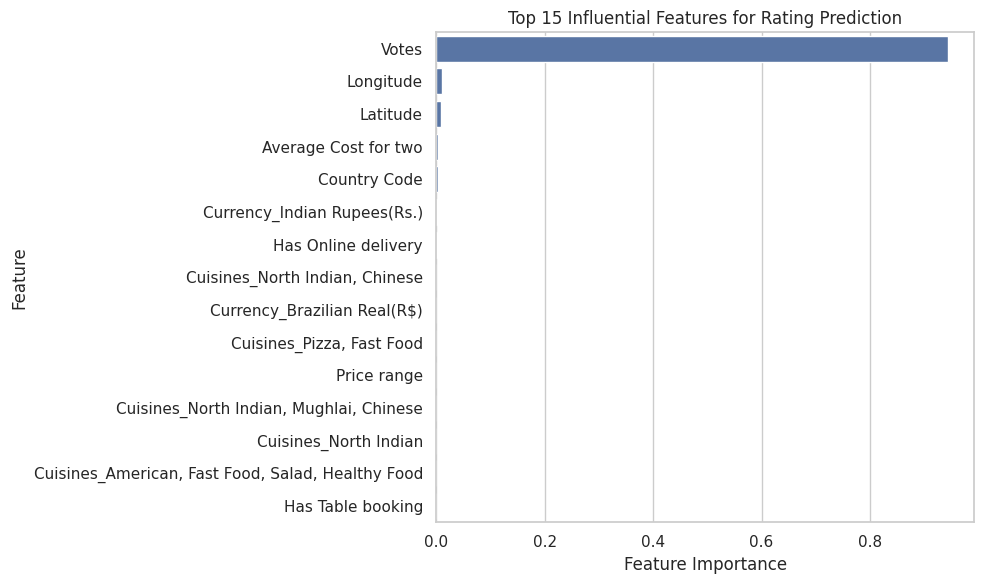

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances, y=top_features)
plt.title("Top 15 Influential Features for Rating Prediction")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
